Flood Fill is a way to to visit every point in a bounded region. This makes it useful for many purposes. In this notebook I implement the "bucket fill" flood fill algo.

First up generating a grid to flood fill:

In [21]:
#| echo: false
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Markdown
def printmd(txt): display(Markdown(txt))

In [22]:
fill = np.random.randint(0, 2, size=(128,128), dtype="int")
fill

array([[0, 1, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 0]])

Eyeballing this grid visually:

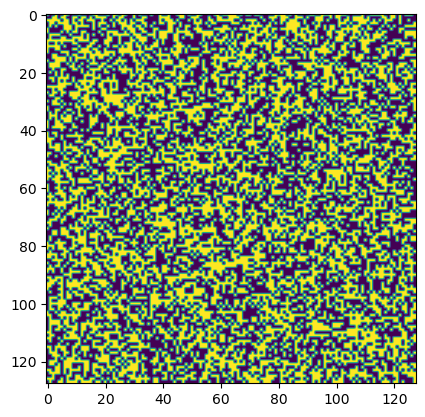

In [12]:
plt.imshow(fill);

## the floodfill algo

The below function is a recursive implementation of flood fill - it will flood fill a a single region from 1 val to another:

In [13]:
def flood_fill(x, y, old, new):
    """takes in a x,y position from where to flood fill, the old val to change from and the new val
    to change too, and then does so on a to_fill array"""
    
    if fill[x][y] != old or fill[x][y] == new:
        return
    
    fill[x][y] = new
    
    max_x = len(fill) - 1
    max_y = len(fill) - 1
    
    if x > 0: # go left
        flood_fill(x-1, y, old, new)
    
    if x < max_x: # go right
        flood_fill(x+1, y, old, new)
        
    if y > 0: # go down
        flood_fill(x, y-1, old, new)
    if y < max_y: # go up
        flood_fill(x, y+1, old, new)

Here, I flood fill the `fill`, converting all the `1`'s to `8`'s.

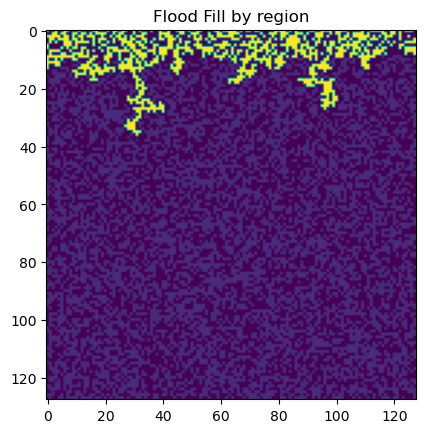

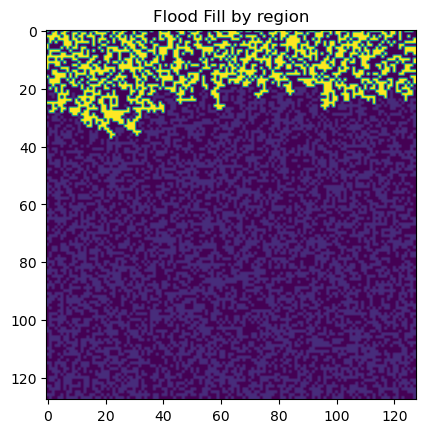

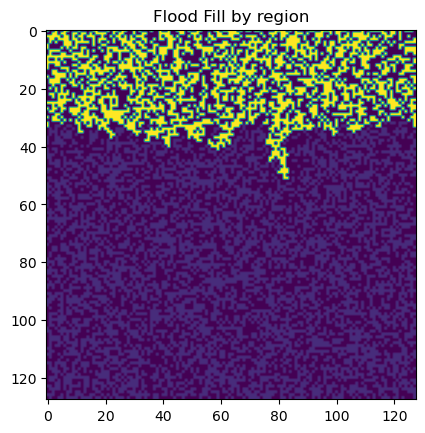

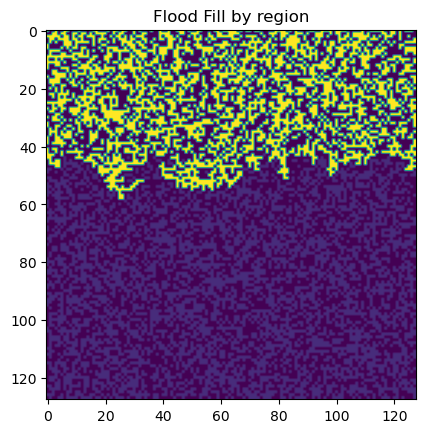

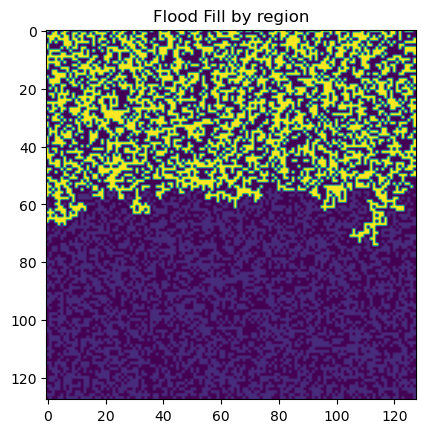

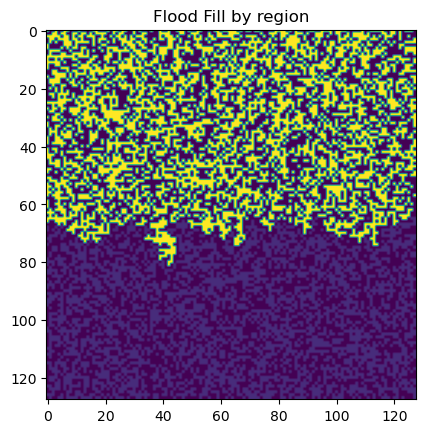

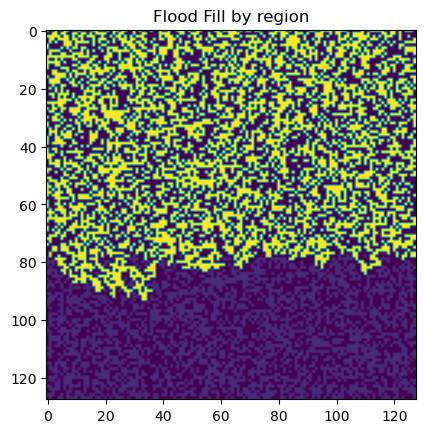

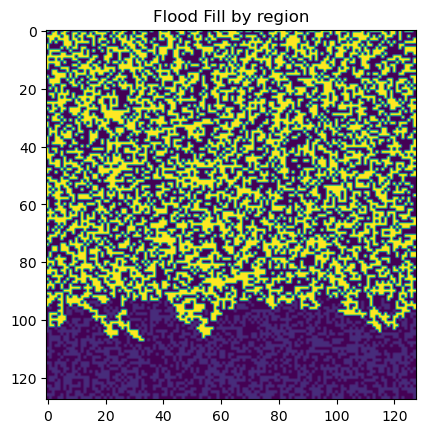

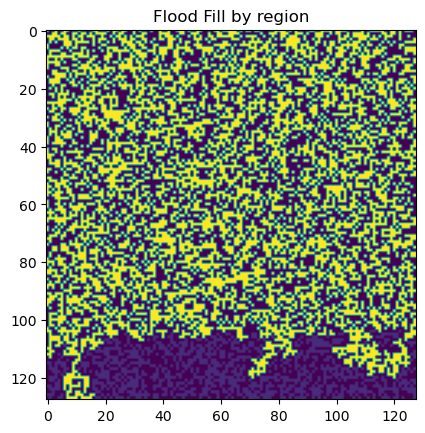

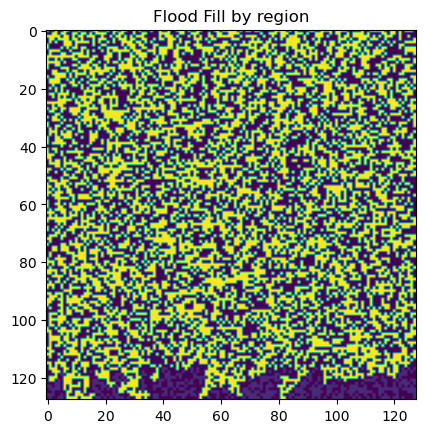

In [14]:
region_count = 0

imagelist = list()
imagelist.append(fill)

for i in range(len(fill)):
    for j in range(len(fill[0])):
        if fill[i][j] == 1:
            flood_fill(i, j, 1, 8)
            region_count += 1
            imagelist.append(fill)
            if region_count % 100 == 0:
                plt.imshow(imagelist[region_count])
                plt.title(f"Flood Fill by region")
                plt.show()